Mean Squared Error: 0.026493039731866348
Root Mean Squared Error: 0.16276682626341998
R² Score: 0.9517818055916741


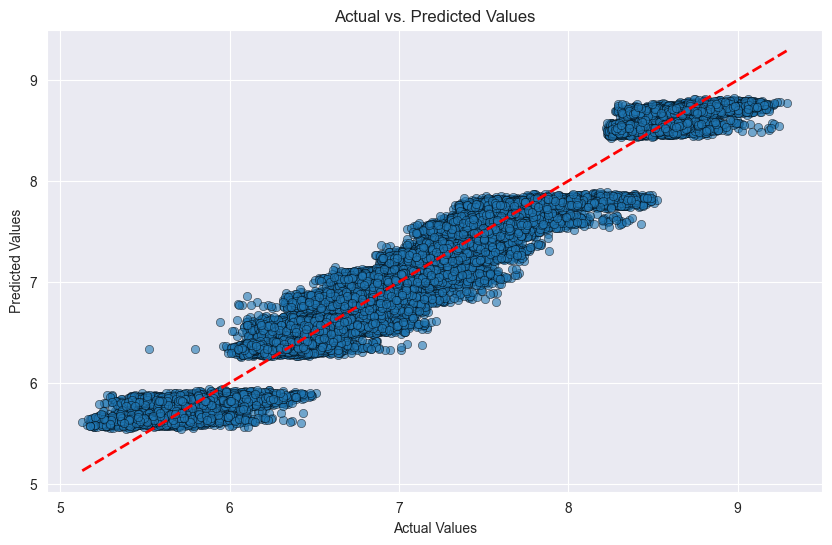

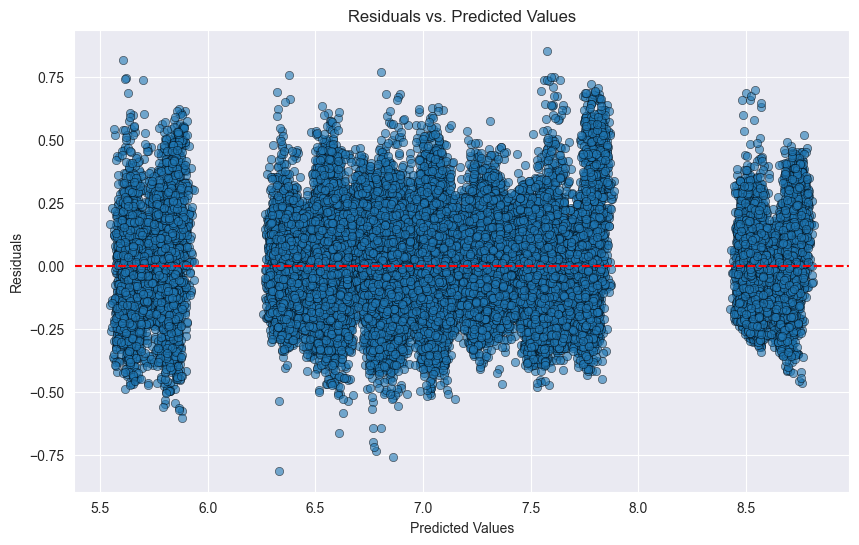

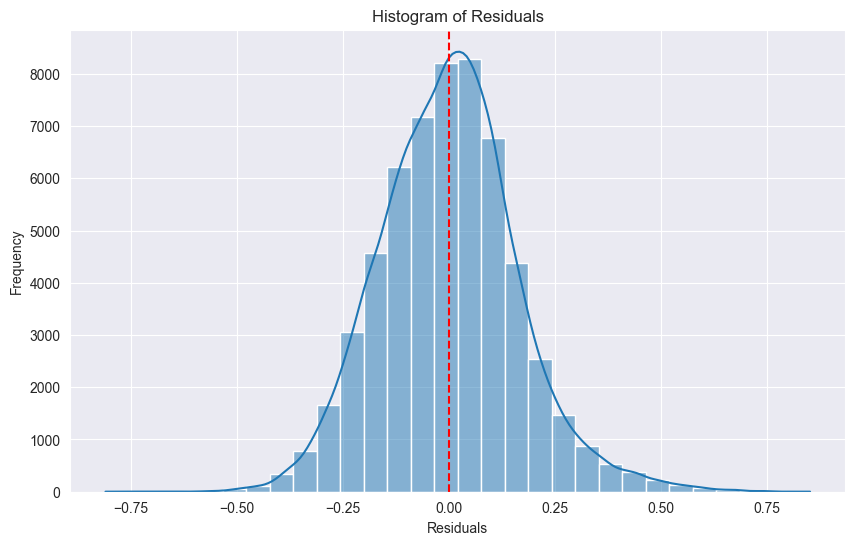

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def load_data(file_path):
    """Loads dataset from a CSV file."""
    return pd.read_csv(file_path)

def train_regression_model(df):
    """Trains a linear regression model, conducts residual analysis, and plots residuals."""

    # Base features
    base_features = ['hour', 'day', 'month', 'weekday', 'temperature_2m']

    # Seasonal features
    season_features = ['season_Winter', 'season_Spring', 'season_Summer', 'season_Fall']

    # Subba features (all columns that start with 'subba_')
    subba_features = [col for col in df.columns if col.startswith('subba_')]

    # Combine all features
    features = base_features + season_features + subba_features
    target = 'value'

    # Ensure required columns exist
    if not all(col in df.columns for col in features + [target]):
        print("Some required columns are missing in the dataset.")
        return

    X = df[features]
    y = df[target]

    # Handling missing values (fill missing data with column means)
    X = X.fillna(X.mean())
    y = y.fillna(y.mean())

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Compute residuals
    residuals = y_test - y_pred

    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R² Score: {r2}')

    # 1️⃣ Plot Actual vs. Predicted values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor="k")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Identity line
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values")
    plt.grid(True)
    plt.show()

    # 2️⃣ Residuals Plot (Residuals vs. Predicted)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, edgecolor="k")
    plt.axhline(y=0, color='r', linestyle='--')  # Zero reference line
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs. Predicted Values")
    plt.grid(True)
    plt.show()

    # 3️⃣ Histogram of Residuals
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, bins=30, kde=True)
    plt.axvline(x=0, color='r', linestyle='--')  # Zero reference line
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Histogram of Residuals")
    plt.show()

def main():
    file_path = "cleaned_normalized_data.csv"  # Update this with the actual file path
    df = load_data(file_path)

    # Train and evaluate regression model
    train_regression_model(df)

if __name__ == "__main__":
    main()
